### Assignment 3

Due: **10:00 10. Juni 2025**

Discussion: **12:00 10. Mai 2025**

**Online submission** at via github classroom  

In [3]:
%pip install matplotlib inline
%pip install spicy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 62.8 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 76.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 76.7 MB/s eta 0:00:00:00:01
  Created wheel for inline: filename=inline-0.0.1-py3-none-any.whl size=3307 sha256=075964a07aabe0ef296b14c4baba58562185a2953fe271eca3c5fcec0f3bd9eb
  Stored in directory: /home/vscode/.cache/pip/wheels/c9/8a/db/02616c360c90d6c6a3ae90f86e79ac02c894ff11a10b7fab5e
Successfully built inline

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip 

# 1. Supernova rate per century - SN1987A

In the lecture we discussed the example of how to estimate the expected rate of supernovae per century, based on past occurances of
supernovae. Using a Bayesian approach we found that the posterior probabilty distribution of supernovae per cuntury (visible by naked eye)
can be described for n supernovae in m centuries as

$$\mathcal{P}(\rho\mathrm{|data}) = \frac{\rho^n(1-\rho)^{m-n}}{B(n+1, m-n+1)}$$

Here the denominator is used to normalize the distribution:

$$\int_0^1\mathcal{P}(\rho\mathrm{|data}) d\rho = \int_0^1 \binom{m}{n} \rho^n (1-\rho)^{m-n} d\rho =$$

$$ \binom{m}{n} \frac{\Gamma(m-n+1)\Gamma(n+1)}{\Gamma(m+2)} = \binom{m}{n} B(n+1, m-n+1)$$

**a.** Write a computer program, to compute $\mathcal{P}(ρ |\mathrm{data})$ for any n supernovae in `m` centuries. **10 Points**

In [5]:
import numpy as np
from scipy.special import beta

def posterior_probability(rho, n, m):
    numerator = rho**n * (1 - rho)**(m - n)
    denominator = beta(n + 1, m - n + 1)
    
    return numerator / denominator

# Beispiel:
rho = 0.7
n = 5
m = 10

result = posterior_probability(rho, n, m)
print(f"P(rho | data) = {result}")


P(rho | data) = 1.1321127972000002


**b.** Plot the distribution $\mathcal{P}(ρ |\mathrm{data})$ for 4 supernovae in 10 centuries and for 5 supernovae in 10 centuries in the same Figure. **5 Points**

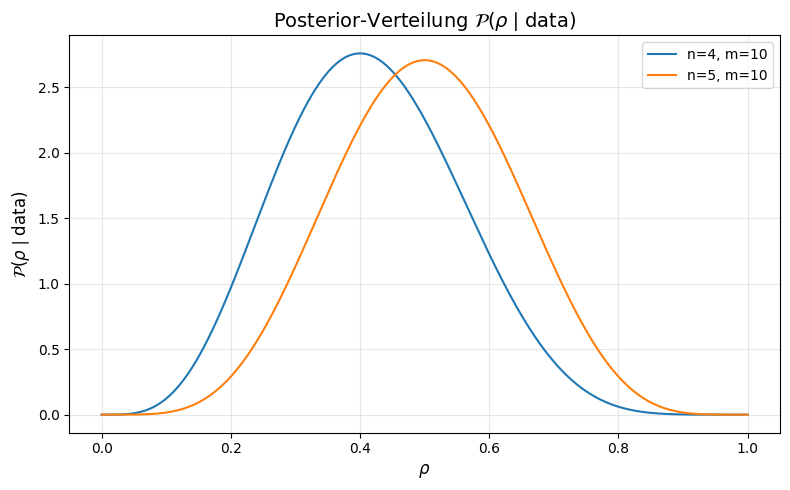

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta

def posterior_probability(rho, n, m):
    numerator = rho**n * (1 - rho)**(m - n)
    denominator = beta(n + 1, m - n + 1)
    return numerator / denominator

# Wertebereich für rho
rho_values = np.linspace(0, 1, 500)

# Parameterpaare (n, m)
parameter_sets = [(4, 10), (5, 10)]

# Plot vorbereiten
plt.figure(figsize=(8, 5))

# Für jedes (n, m)-Paar die Verteilung berechnen und plotten
for n, m in parameter_sets:
    posterior_values = posterior_probability(rho_values, n, m)
    plt.plot(rho_values, posterior_values, label=fr'n={n}, m={m}')

# Plot-Anpassungen
plt.title(r'Posterior-Verteilung $\mathcal{P}(\rho \mid \mathrm{data})$', fontsize=14)
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel(r'$\mathcal{P}(\rho \mid \mathrm{data})$', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


**c.** Assume, that the true distribution $\mathcal{P}(ρ |\mathrm{data})$ would be $\mathcal{P}(ρ |\mathrm{data})= \frac{\rho^8(1-\rho)^{10-8}}{B(8+1, 10-8+1)}$ i.e. 8 supernovae in 10 centuries.

 > **i.** Plot the distribution now. **5 Points**

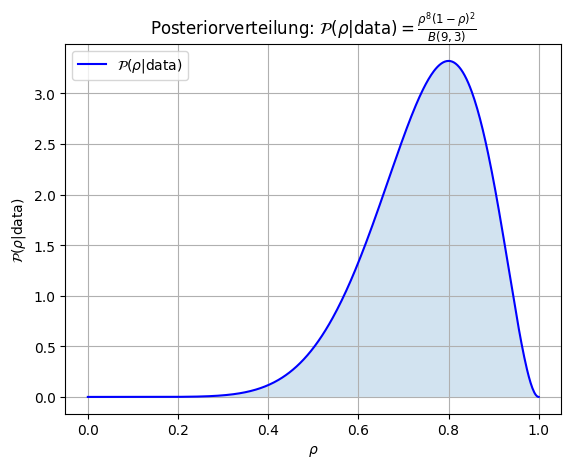

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Beta-Verteilung mit Parametern a = 9, b = 3
a = 8 + 1
b = (10 - 8) + 1

rho = np.linspace(0, 1, 500)
posterior = beta.pdf(rho, a, b)  # Dichtefunktion der Beta-Verteilung

# Plot
plt.plot(rho, posterior, label=r'$\mathcal{P}(\rho|\mathrm{data})$', color='blue')
plt.fill_between(rho, posterior, alpha=0.2)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\mathcal{P}(\rho|\mathrm{data})$')
plt.title(r'Posteriorverteilung: $\mathcal{P}(\rho|\mathrm{data}) = \frac{\rho^8(1-\rho)^2}{B(9,3)}$')
plt.grid(True)
plt.legend()
plt.show()


 > **ii.** Compute the probability, given this distribution, to observe 5 supernovae or less in 10 centuries. **10 Points**

In [4]:
import numpy as np
from scipy.special import beta as beta_func  # Beta-Funktion
from scipy.stats import poisson
from scipy.integrate import quad

# Daten: Anzahl Erfolge (Supernovae), Anzahl Gesamtbeobachtungen
n = 8
m = 10

# Parameter der Beta-Verteilung
a = n + 1
b = m - n + 1

# Die Posterior-Funktion explizit nach Formel definieren
def posterior_rho(rho):
    return (rho**n * (1 - rho)**(m - n)) / beta_func(a, b)

# Plot der Posteriorverteilung
rho_vals = np.linspace(0, 1, 500)
posterior_vals = posterior_rho(rho_vals)

# Ziel: P(k <= 5) für λ = 10 * ρ
def integrand(rho):
    lam = 10 * rho
    return poisson.cdf(5, mu=lam) * posterior_rho(rho)

# Numerische Integration
prob, error = quad(integrand, 0, 1)

print(f"Wahrscheinlichkeit, ≤5 Supernovae in 10 Jahrhunderten (mit Posterior): {prob:.4f}")


Wahrscheinlichkeit, ≤5 Supernovae in 10 Jahrhunderten (mit Posterior): 0.2652


# 2. Samples & Sampling Simulation

Write a numerical simulation code that reproduces the behaviour of the following simulation. (Also shown in the lecture.)

Draw N samples of size n from a population with $\mu=5$ and $\sigma=1$. Compute the confidence intervals (CI) of each sample distribution and the sampling distribution and visualize it in a similar manner. Test your simulation against your theoretical expectations. Make sure to test your result and to confirm that the result is as expected. (i.e. About 5 % of the samples not overlapping with the confidence interval, or 5% of all simulations with the population mean not part of the confidence interval.) **30 Points**

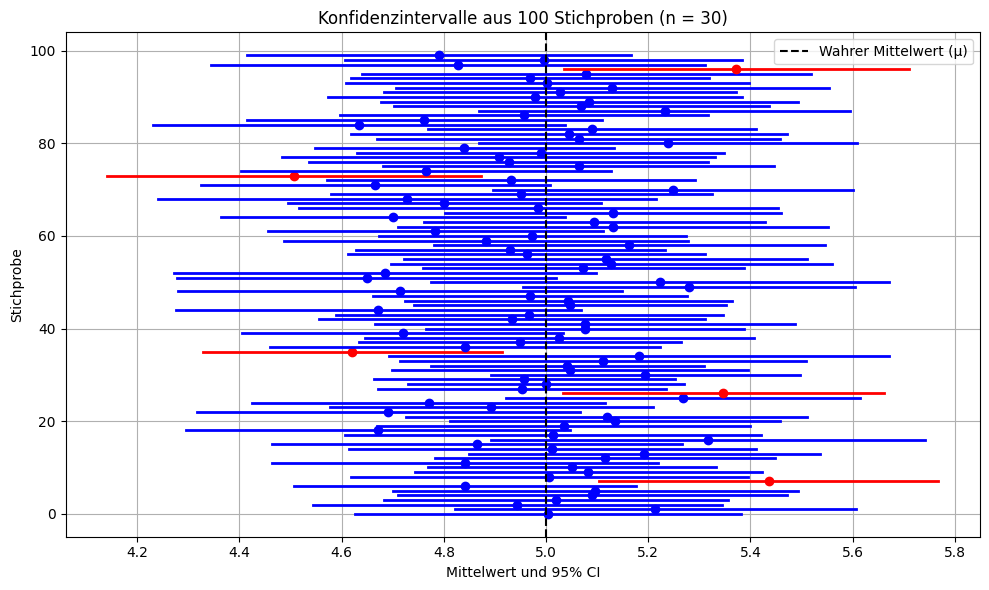

Anzahl Intervalle, die μ=5 NICHT enthalten: 5 von 100 (5.0%)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameter
mu = 5        # Populationsmittelwert
sigma = 1     # Populationsstandardabweichung
n = 30       # Stichprobengröße
N = 100       # Anzahl der Stichproben
alpha = 0.05  # Signifikanzniveau (für 95% CI)

# Datencontainer
sample_means = []
ci_lower = []
ci_upper = []
misses = []

# Simulation
for i in range(N):
    sample = np.random.normal(loc=mu, scale=sigma, size=n)
    mean = np.mean(sample)
    sem = stats.sem(sample)  # Standardfehler des Mittelwerts
    t_crit = stats.t.ppf(1 - alpha / 2, df=n - 1)  # t-Wert für 95%-CI
    margin = t_crit * sem

    lower = mean - margin
    upper = mean + margin

    # Speichern
    sample_means.append(mean)
    ci_lower.append(lower)
    ci_upper.append(upper)
    misses.append(mu < lower or mu > upper)  # True wenn mu nicht im CI

# Visualisierung
plt.figure(figsize=(10, 6))
for i in range(N):
    color = 'red' if misses[i] else 'blue'
    plt.plot([ci_lower[i], ci_upper[i]], [i, i], color=color, lw=2)
    plt.plot(sample_means[i], i, 'o', color=color)

plt.axvline(mu, color='black', linestyle='--', label='Wahrer Mittelwert (μ)')
plt.xlabel('Mittelwert und 95% CI')
plt.ylabel('Stichprobe')
plt.title(f'Konfidenzintervalle aus {N} Stichproben (n = {n})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Auswertung
num_misses = sum(misses)
print(f"Anzahl Intervalle, die μ={mu} NICHT enthalten: {num_misses} von {N} ({100 * num_misses / N:.1f}%)")


\newpage

# 3. Parametric tests: mean
A very common question arises when we have two sets of data (or one set of data and a model) and we ask if they differ in location. To contrast the classical and Bayesian methods for hypothesis testing, we look at the simple case of comparison of means. We deal with a Gaussian distribution, because its analytical tractability has resulted in many tests being developed for Gaussian data; and then, of course, there is the central limit theorem.

Let us suppose we have $n$ data $X_i$ drawn from a Gaussian of mean $\mu_x$, and $m$ other data $Y_i$, drawn from a Gaussian of **identical variance** but different mean $\mu_y$. Call the common variance $\sigma^2$. The Bayesian method is to calculate the joint posterior distribution:

$$ \mathcal{P}(\mu_x,\mu_y,\sigma)\propto\dfrac{1}{\sigma^{n+m+1}}\exp\left(-\dfrac{\Sigma_i (x_i-\mu_x)^2}{2\sigma^2}\right)\exp\left(-\dfrac{\Sigma_i (y_i-\mu_y)^2}{2\sigma^2}\right) $$

in which we have used the Jeffreys prior for the variance. Integrating over the 'nuisance' parameter $\sigma$, we would get the joint probability prob($\mu_x,\mu_y$) and could use it to derive, for example, the probability that $\mu_x$ is bigger than $\mu_y$. From this we can calculate the probability distribution of ($\mu_x-\mu_y$). The result depends on the data via a quantity

$$ t^\prime = \dfrac{(\mu_x-\mu_y)-(\bar{X}-\bar{Y})}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}, \qquad \textrm{where} \qquad s^2 = \dfrac{nS_x+mS_y}{\nu} $$

with the usual mean squares $S_x = \Sigma (X_i-\bar{X})^2 / n$, similarly for $S_y$, and $\nu=n+m-2$. $s$ is called pooled standard deviation. The probability for $t^\prime$ is

$$ \mathcal{P}(t^\prime) = \dfrac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\dfrac{t^{\prime 2}}{\nu}\right)^{-\frac{1}{2}(\nu+1)} $$

We regard the data as fixed and $(\mu_x-\mu_y)$ as the variable, simply computing the probability of any particular difference in the means. We might alternatively work out the range of differences whichare, say, 90 percent probable, or we might carry the distribution of $(\mu_x-\mu_y)$ on into a later probabilistic calculation. If we instead follow the classical line of reasoning, we do not treat the $\mu$'s as random variables. Instead we guess that the difference in the averages $X-Y$ will be the statistic we need; and we calculate its distribution on the null hypothesis that $\mu_x=\mu_y$. We find that

$$ t=\dfrac{\bar{X}-\bar{Y}}{s\sqrt{\frac{1}{m}+\frac{1}{n}}} $$

follows a t-distribution with $(n+m-2)$ degrees of freedom. This is the classical Student's t. This gives the basis of a classical hypothesis test, the t-test for means. Assuming that $(\mu_x-\mu_y)=0$ (the null hypothesis), we calculate t. If it (or some greater value) is very unlikely, we think that the null hypothesis is ruled out.

**a.** Suppose we have two small sets of data, from Gaussian distributions of equal variance: $(-1.22, -1.17, 0.93, -0.58, -1.14) \in A$ and $(1.03, -1.59, -0.41, 0.71, 2.10) \in B$. Compute the respective mean values and the pooled standard deviation $s$ **5 Points**

In [14]:
import numpy as np

# Daten
A = np.array([-1.22, -1.17, 0.93, -0.58, -1.14])
B = np.array([1.03, -1.59, -0.41, 0.71, 2.10])

# Mittelwerte
mean_A = np.mean(A)
mean_B = np.mean(B)

# Stichprobengrößen
n = len(A)
m = len(B)

# Quadratsummen (Mean Squares)
S_A = np.sum((A - mean_A)**2) / n
S_B = np.sum((B - mean_B)**2) / m

# Gepoolte Varianz und Standardabweichung
nu = n + m - 2
s_squared = (n * S_A + m * S_B) / nu
s = np.sqrt(s_squared)

# Ausgabe
print(f"Mittelwert A: {mean_A:.3f}")
print(f"Mittelwert B: {mean_B:.3f}")
print(f"Gepoolte Standardabweichung s: {s:.3f}")


Mittelwert A: -0.636
Mittelwert B: 0.368
Gepoolte Standardabweichung s: 1.190


**b.** Compute the t statistic. Perform a two tailed test. What is the chance that these data would arise if the means were the same. What is the chance if we did a one-tailed test? **10 Points**

In [15]:
import numpy as np
from scipy import stats

# Gegebene Daten
A = np.array([-1.22, -1.17, 0.93, -0.58, -1.14])
B = np.array([1.03, -1.59, -0.41, 0.71, 2.10])

# Mittelwerte
mean_A = np.mean(A)
mean_B = np.mean(B)

# Stichprobengrößen
n = len(A)
m = len(B)

# Mean Squares
S_A = np.sum((A - mean_A)**2) / n
S_B = np.sum((B - mean_B)**2) / m

# Gepoolte Varianz und Standardabweichung
nu = n + m - 2
s_squared = (n * S_A + m * S_B) / nu
s = np.sqrt(s_squared)

# t-Statistik
t_stat = (mean_A - mean_B) / (s * np.sqrt(1/n + 1/m))

# Zwei-seitiger p-Wert
p_two_tailed = 2 * stats.t.sf(np.abs(t_stat), df=nu)

# Einseitiger p-Wert
p_one_tailed = stats.t.sf(np.abs(t_stat), df=nu)

# Ausgabe
print(f"Mittelwert A: {mean_A:.3f}")
print(f"Mittelwert B: {mean_B:.3f}")
print(f"t-Statistik: {t_stat:.3f}")
print(f"Freiheitsgrade: {nu}")
print(f"Zwei-seitiger p-Wert: {p_two_tailed:.4f}")
print(f"Einseitiger p-Wert: {p_one_tailed:.4f}")


Mittelwert A: -0.636
Mittelwert B: 0.368
t-Statistik: -1.334
Freiheitsgrade: 8
Zwei-seitiger p-Wert: 0.2189
Einseitiger p-Wert: 0.1095


**c.** Calculate the distribution of $(\mu_x-\mu_y)$ from a Bayesian point of view and plot the resulting prob($\mu_x-\mu_y$) as a function of $(\mu_x-\mu_y)$. What is the chance that $\mu_x$ is not smaller than $\mu_y$? **10 Points**

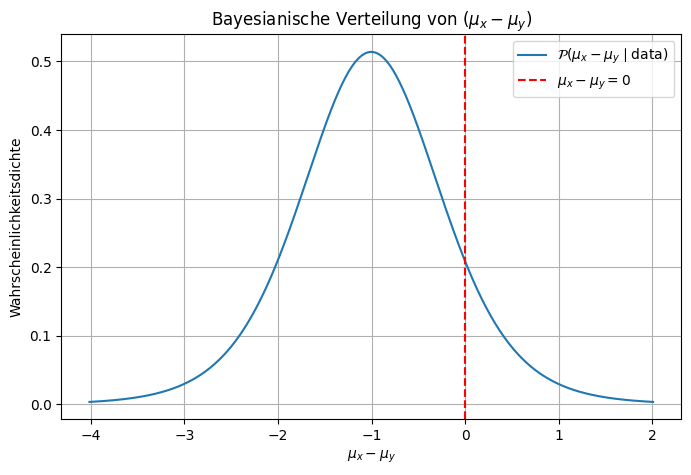

Wahrscheinlichkeit, dass μ_x nicht kleiner als μ_y ist: 0.1095


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Gegebene Daten
A = np.array([-1.22, -1.17, 0.93, -0.58, -1.14])
B = np.array([1.03, -1.59, -0.41, 0.71, 2.10])

# Berechnung von Mittelwerten und Stichprobengrößen
mean_A = np.mean(A)
mean_B = np.mean(B)
n = len(A)
m = len(B)

# Berechnung der gepoolten Varianz und Standardabweichung
S_A = np.sum((A - mean_A)**2) / n
S_B = np.sum((B - mean_B)**2) / m
nu = n + m - 2
s_squared = (n * S_A + m * S_B) / nu
s = np.sqrt(s_squared)

# Standardfehler der Differenz
SE_diff = s * np.sqrt(1/n + 1/m)

# Wertebereich für (mu_x - mu_y)
diff_range = np.linspace(mean_A - mean_B - 4*SE_diff, mean_A - mean_B + 4*SE_diff, 500)

# t' Werte für die Verschiebung
t_prime = (diff_range - (mean_A - mean_B)) / SE_diff

# Wahrscheinlichkeitsdichte der Verteilung von (mu_x - mu_y)
pdf = t.pdf(t_prime, df=nu) / SE_diff  # Transformation der Dichte

# Plot der Verteilung
plt.figure(figsize=(8,5))
plt.plot(diff_range, pdf, label=r'$\mathcal{P}(\mu_x - \mu_y \mid \mathrm{data})$')
plt.axvline(0, color='red', linestyle='--', label=r'$\mu_x - \mu_y = 0$')
plt.xlabel(r'$\mu_x - \mu_y$')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Bayesianische Verteilung von $(\mu_x - \mu_y)$')
plt.legend()
plt.grid(True)
plt.show()

# Berechnung der Wahrscheinlichkeit, dass mu_x >= mu_y
# entspricht P(mu_x - mu_y >= 0)
prob_mu_x_ge_mu_y = 1 - t.cdf((0 - (mean_A - mean_B)) / SE_diff, df=nu)

print(f"Wahrscheinlichkeit, dass μ_x nicht kleiner als μ_y ist: {prob_mu_x_ge_mu_y:.4f}")


**d.** By analogous calculations we arrive at the F test for variances. Again Gaussian distributions are assumed. The null hypothesis is $\sigma_x=\sigma_y$, the data are $X_i (i=1,\ldots,n)$ and $Y_i (i=1,\ldots,m)$ and the test statistic is,

$${\cal F} = \dfrac{\Sigma_i\left(X_i-\bar{X}\right)^2/(n-1)}{\Sigma_i\left(Y_i-\bar{Y}\right)^2/(m-1)}$$

This follows the F ratio distribution with $(n-1)$ and $(m-1)$ degrees of freedom. The testing is the as for the Student's t. Perform a test whether the variances of the two data sets are the same. **15 Points**

In [17]:
import numpy as np
from scipy.stats import f

# Gegebene Daten
A = np.array([-1.22, -1.17, 0.93, -0.58, -1.14])
B = np.array([1.03, -1.59, -0.41, 0.71, 2.10])

# Stichprobengrößen
n = len(A)
m = len(B)

# Stichprobenmittelwerte
mean_A = np.mean(A)
mean_B = np.mean(B)

# Stichprobenvarianzen (unbiased, also mit n-1 im Nenner)
var_A = np.sum((A - mean_A)**2) / (n - 1)
var_B = np.sum((B - mean_B)**2) / (m - 1)

# F-Statistik (größere Varianz im Zähler für zweiseitigen Test)
if var_A >= var_B:
    F_stat = var_A / var_B
    dfn = n - 1  # Freiheitsgrad Zähler
    dfd = m - 1  # Freiheitsgrad Nenner
else:
    F_stat = var_B / var_A
    dfn = m - 1
    dfd = n - 1

# p-Wert für zweiseitigen Test
# Berechnung der Wahrscheinlichkeit, dass F >= beobachtetem Wert oder F <= inverse
p_one_tail = 1 - f.cdf(F_stat, dfn, dfd)
p_two_tail = 2 * p_one_tail

# p-Wert darf max 1 sein
p_two_tail = min(p_two_tail, 1.0)

# Ausgabe
print(f"Varianz A: {var_A:.4f}")
print(f"Varianz B: {var_B:.4f}")
print(f"F-Statistik: {F_stat:.4f}")
print(f"Freiheitsgrade: ({dfn}, {dfd})")
print(f"Zweiseitiger p-Wert: {p_two_tail:.4f}")

# Interpretation
if p_two_tail < 0.05:
    print("Das Ergebnis ist signifikant: Varianzen unterscheiden sich.")
else:
    print("Keine ausreichende Evidenz, dass die Varianzen unterschiedlich sind.")


Varianz A: 0.8339
Varianz B: 1.9985
F-Statistik: 2.3965
Freiheitsgrade: (4, 4)
Zweiseitiger p-Wert: 0.4180
Keine ausreichende Evidenz, dass die Varianzen unterschiedlich sind.
